## Imports

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Pitcher CSV file

In [4]:
Pitchers = pd.read_csv('/Users/kellyjara/Desktop/Project3/Data/Pitchers.csv')
Pitchers

,Unnamed: 0,Name,League,Pitches,G,W,L,IP,H,R,...,ERA,WHIP,Oppo%,K%,BB%,WHIP Rank,WHIP_Rank,ERA Rank,ERA_Rank,Leagues
0,0,Bartolo Colon,Major,2706,33,14,13,194.2,217,94,...,4.160000,1.240989,30.000000,16.700000,2.900000,Average,2,Poor,0,1
1,1,A.J. Burnett,Major,2500,26,9,7,164.0,174,64,...,3.180000,1.359756,25.000000,20.500000,7.000000,Below Average,1,Above Average,2,1
2,2,Tim Hudson,Major,1854,24,8,9,123.2,134,62,...,4.440000,1.387987,22.500000,12.200000,7.000000,Below Average,1,Poor,0,1
3,3,Mark Buehrle,Major,2829,32,15,8,198.2,214,100,...,3.810000,1.246216,23.400000,11.000000,4.000000,Average,2,Below Average,4,1
4,4,CC Sabathia,Major,2703,29,6,10,167.1,188,92,...,4.730000,1.424297,20.800000,18.900000,6.900000,Poor,0,Poor,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,5890,Tom de Blok,Minor,4501,64,11,21,294.2,277,139,...,3.909502,1.255656,0.304204,0.187952,0.074699,Average,2,Below Average,4,0
6903,5891,Adrian Alcantara,Minor,5312,95,22,24,372.0,346,213,...,4.524194,1.327957,0.254335,0.236250,0.092500,Below Average,1,Poor,0,0
6904,5892,Osvaldo Hernandez,Minor,5612,106,22,23,355.0,364,178,...,3.777465,1.312676,0.285980,0.212121,0.067194,Below Average,1,Below Average,4,0
6905,5893,Parker Curry,Minor,4162,97,15,20,259.2,256,130,...,3.916560,1.274711,0.286280,0.250896,0.067204,Average,2,Below Average,4,0


In [5]:
Pitchers.drop(columns = 'Unnamed: 0',inplace = True)

In [6]:
Pitchers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6907 entries, 0 to 6906
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       6907 non-null   object 
 1   League     6907 non-null   object 
 2   Pitches    6907 non-null   int64  
 3   G          6907 non-null   int64  
 4   W          6907 non-null   int64  
 5   L          6907 non-null   int64  
 6   IP         6907 non-null   float64
 7   H          6907 non-null   int64  
 8   R          6907 non-null   int64  
 9   HR         6907 non-null   int64  
 10  SO         6907 non-null   int64  
 11  BB         6907 non-null   int64  
 12  ER         6907 non-null   int64  
 13  SV         6907 non-null   int64  
 14  BS         6907 non-null   int64  
 15  BK         6907 non-null   int64  
 16  ERA        6907 non-null   float64
 17  WHIP       6907 non-null   float64
 18  Oppo%      6907 non-null   float64
 19  K%         6907 non-null   float64
 20  BB%     

## Preprocessing

### Logistic Model 1

In [7]:
feats = ['Pitches','G', 'W','L','IP','H','R','HR','SO','BB','ER','SV',
         'BS','BK','ERA','WHIP']

In [8]:
X = Pitchers[feats]
y = Pitchers['Leagues']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [10]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
LR_Model = LogisticRegression(random_state=42)
LR_Model.fit(X_train_scaled, y_train)
LR_preds = LR_Model.predict(X_test_scaled)

In [12]:
print('Training:', LR_Model.score(X_train_scaled, y_train))
print('Test:', LR_Model.score(X_test_scaled, y_test))

Training: 0.9703167420814479
Test: 0.9703328509406657


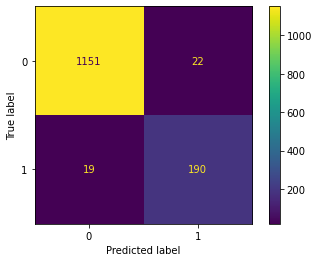

In [13]:
LR_CM =confusion_matrix(y_test,LR_preds);
ConfusionMatrixDisplay(LR_CM).plot()

In [14]:
# True Positive Rate
TPR = 190 / (190 + 19)
TPR

0.9090909090909091

In [15]:
accuracy = accuracy_score(y_test, LR_preds)
print(accuracy)
precision = precision_score(y_test, LR_preds)
print(precision)
recall = recall_score(y_test, LR_preds)
print(recall)
f1 = f1_score(y_test, LR_preds)
print(f1)

0.9703328509406657
0.8962264150943396
0.9090909090909091
0.9026128266033254


In [16]:
LR_probas = LR_Model.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, LR_probas)

0.9928005319040452

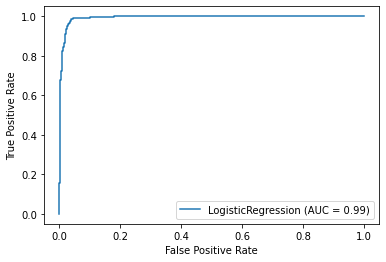

In [17]:
plot_roc_curve(LR_Model, X_test_scaled, y_test)

### Decission Tree Model 2

In [18]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [19]:
print('Training:', dt.score(X_train_scaled, y_train))
print('Test:', dt.score(X_test_scaled, y_test))

Training: 0.9476923076923077
Test: 0.9384949348769899


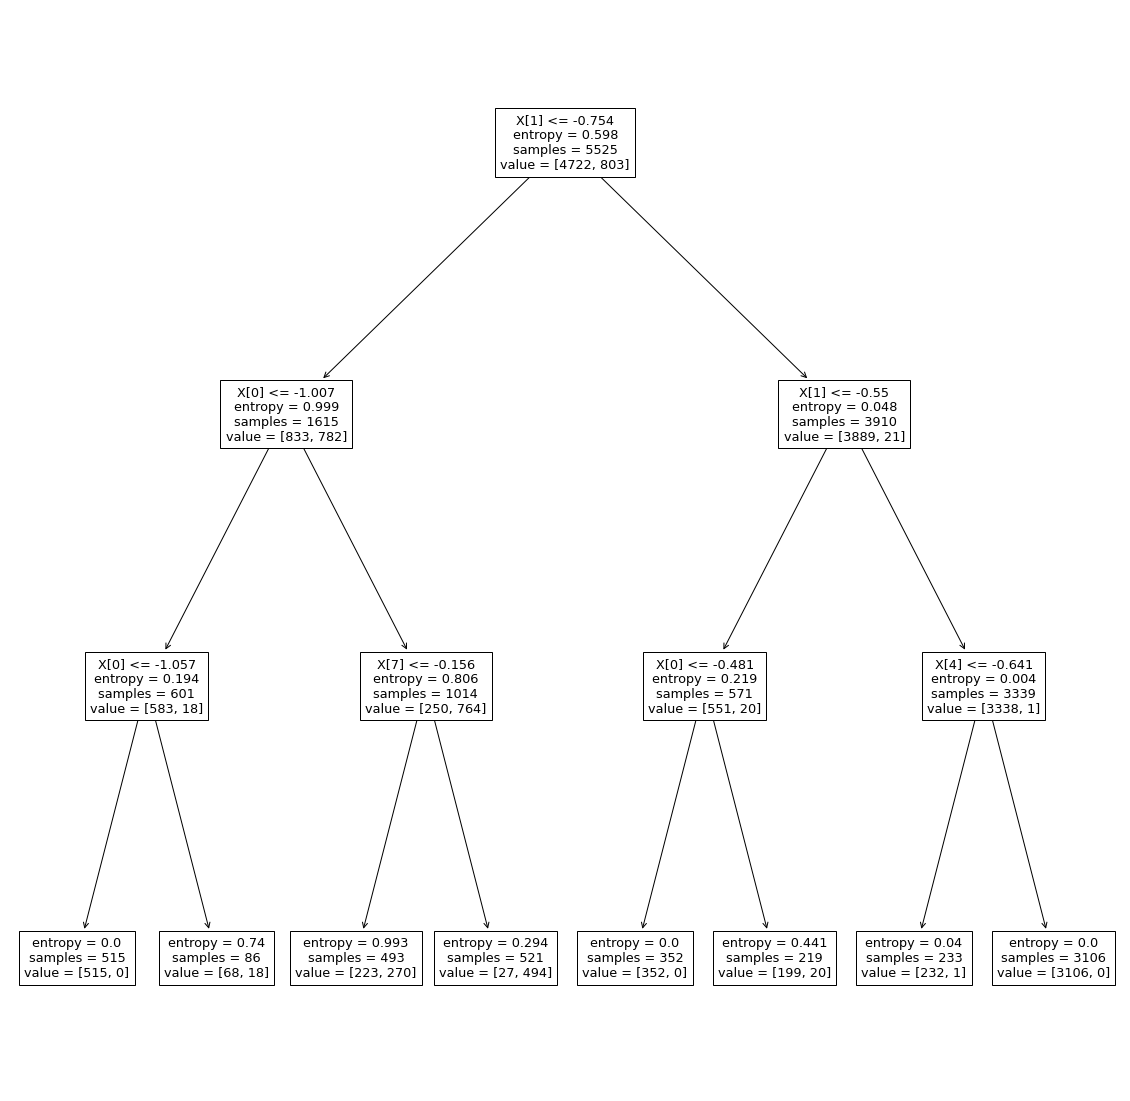

In [90]:
f, ax = plt.subplots(figsize =(20,20))
plot_tree(dt, ax=ax);

In [21]:
dt_preds = dt.predict(X_test_scaled)

In [22]:
accuracy = accuracy_score(y_test, dt_preds)
print(accuracy)
precision = precision_score(y_test, dt_preds)
print(precision)
recall = recall_score(y_test, dt_preds)
print(recall)
f1 = f1_score(y_test, dt_preds)
print(f1)

0.9384949348769899
0.7348484848484849
0.9282296650717703
0.8202959830866808


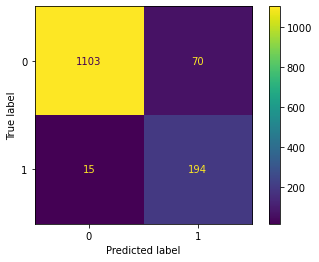

In [89]:
dt_CM =confusion_matrix(y_test,dt_preds);
ConfusionMatrixDisplay(dt_CM).plot()

In [24]:
roc_auc_score(y_test,dt_preds)

0.9342768103704973

In [25]:
y_test.value_counts(normalize = True)

0    0.84877
1    0.15123
Name: Leagues, dtype: float64

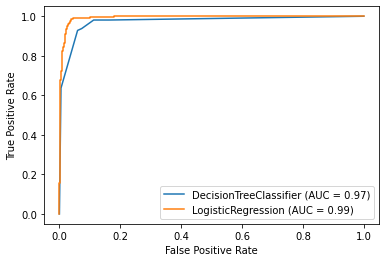

In [91]:
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(LR_Model, X_test_scaled, y_test, ax=ax)

In [27]:
### viewing league class and looking for imbalance

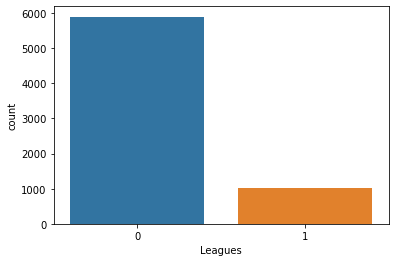

In [92]:
sns.countplot(Pitchers['Leagues'])

In [29]:
Pitchers['Leagues'].value_counts()

0    5895
1    1012
Name: Leagues, dtype: int64

In [30]:
# based on baseline models and plot above... Data is imbalanced

### Using SMOTE - LR Model 3

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [33]:
sm_model = LogisticRegression()
sm_fit = sm_model.fit(X_train_res, y_train_res.ravel())
sm_pred = sm_fit.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, sm_pred)
print(accuracy)
precision = precision_score(y_test, sm_pred)
print(precision)
recall = recall_score(y_test, sm_pred)
print(recall)
f1 = f1_score(y_test, sm_pred)
print(f1)

0.9768451519536903
0.8864628820960698
0.9712918660287081
0.9269406392694063


In [35]:
roc_auc_score(y_test, sm_pred)

0.97456323906721

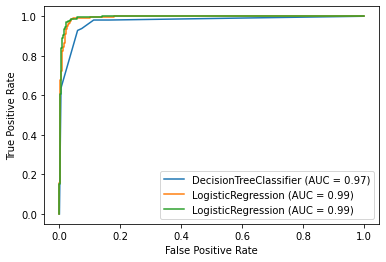

In [93]:
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(LR_Model, X_test_scaled, y_test, ax=ax)
plot_roc_curve(sm_model, X_test, y_test, ax=ax)

In [37]:
print('Training:', sm_model.score(X_train_res, y_train_res))
print('Test:', sm_model.score(X_test, y_test))

Training: 0.9763871240999576
Test: 0.9768451519536903


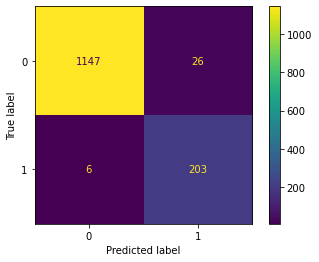

In [94]:
dt_CM =confusion_matrix(y_test,sm_pred);
ConfusionMatrixDisplay(dt_CM).plot()

In [39]:
# Adding more imports

In [40]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer

In [41]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display = 'diagram')

### Grid Search KNN Model 5

In [43]:
steps = [('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

model_pipe = Pipeline(steps)

In [44]:
pipe_grid = {'imputer__strategy': ["mean", "median"],
             'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 18],
             'knn__p': [1, 2, 3, 4]}

gs_pipe = GridSearchCV(estimator=model_pipe, 
                       param_grid=pipe_grid)

In [45]:
gs_pipe.fit(X_train, y_train);

In [46]:
gs_pipe.best_params_

{'imputer__strategy': 'mean', 'knn__n_neighbors': 18, 'knn__p': 1}

In [47]:
gs_pipe.best_score_

0.9572850678733031

In [48]:
gs_model = gs_pipe.best_estimator_
gs_model

Pipeline(steps=[('imputer', SimpleImputer()), ('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=18, p=1))])

In [49]:
gs_pred = gs_model.predict(X_test)

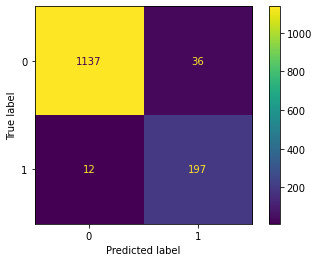

In [95]:
gs_CM =confusion_matrix(y_test,gs_pred);
ConfusionMatrixDisplay(gs_CM).plot()

In [51]:
accuracy = accuracy_score(y_test, gs_pred)
print(accuracy)
precision = precision_score(y_test, gs_pred)
print(precision)
recall = recall_score(y_test, gs_pred)
print(recall)
f1 = f1_score(y_test, gs_pred)
print(f1)

0.9652677279305355
0.8454935622317596
0.9425837320574163
0.8914027149321266


In [52]:
print('Training:', gs_model.score(X_train, y_train))
print('Test:', gs_model.score(X_test, y_test))

Training: 0.9632579185520362
Test: 0.9652677279305355


In [53]:
roc_auc_score(y_test, gs_pred)

0.9559465974865087

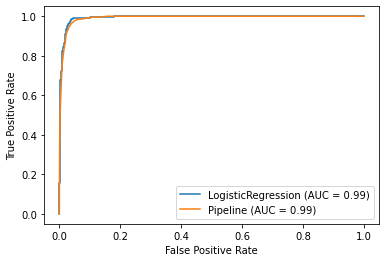

In [96]:
fig, ax = plt.subplots()

plot_roc_curve(LR_Model, X_test_scaled, y_test, ax=ax) # model 2

plot_roc_curve(gs_model, X_test, y_test, ax=ax) # model 5

### Random Forest Model 6

In [55]:
# Adding import for random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_pipe = Pipeline([('scaler', StandardScaler()),
                   ('model', RandomForestClassifier(n_estimators = 100, max_depth = 8))])

In [58]:
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(max_depth=8))])

In [59]:
print(rf_pipe.score(X_train,y_train))
print(rf_pipe.score(X_test,y_test))

0.9909502262443439
0.9790159189580319


In [60]:
rf_pred = rf_pipe.predict(X_test)

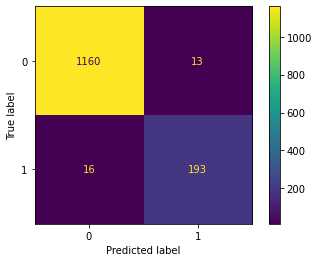

In [97]:
rf_CM =confusion_matrix(y_test,rf_pred);
ConfusionMatrixDisplay(rf_CM).plot()

In [62]:
accuracy = accuracy_score(y_test, rf_pred)
print(accuracy)
precision = precision_score(y_test, rf_pred)
print(precision)
recall = recall_score(y_test, rf_pred)
print(recall)
f1 = f1_score(y_test, rf_pred)
print(f1)

0.9790159189580319
0.9368932038834952
0.9234449760765551
0.9301204819277109


In [63]:
roc_auc_score(y_test, rf_pred)

0.9561811410647054

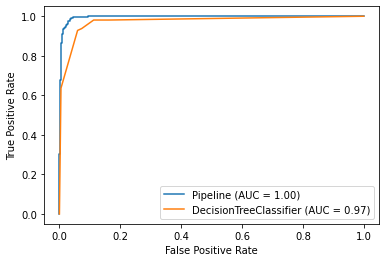

In [98]:
fig, ax = plt.subplots()

plot_roc_curve(rf_pipe, X_test, y_test, ax=ax) # model 6

plot_roc_curve(dt, X_test_scaled, y_test, ax=ax) # model 2

#comparing decision tree model with random forest model

### Feature Importance - Best Model (Random Forest)

In [65]:
importance = rf_pipe['model'].feature_importances_

In [66]:
pd.DataFrame(zip(X_train.columns, importance)).sort_values(by = 1, ascending = False)

,0,1
1,G,0.313318
7,HR,0.142081
0,Pitches,0.116050
12,BS,0.105943
11,SV,0.069608
4,IP,0.047000
9,BB,0.040142
5,H,0.034169
13,BK,0.032179
8,SO,0.028247


In [67]:
rf_pipe['model'].feature_importances_

array([0.11605048, 0.31331818, 0.00827627, 0.00552717, 0.04699953,
       0.03416935, 0.02548366, 0.14208147, 0.0282475 , 0.040142  ,
       0.01756774, 0.06960836, 0.10594325, 0.03217871, 0.00688096,
       0.00752537])

In [99]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
#Define size of bar plot
    plt.figure(figsize=(15,10))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

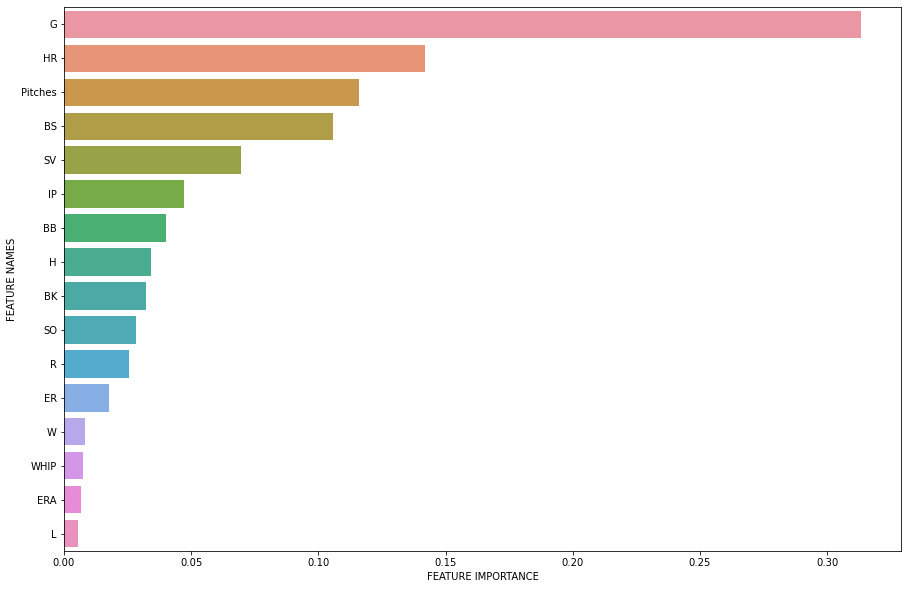

In [100]:
plot_feature_importance(rf_pipe['model'].feature_importances_, X_train.columns,'RANDOM FOREST')

### Predictive Model

In [70]:
Pitchers[feats]
names = Pitchers['Name']
target = Pitchers['League']

In [71]:
full_preds = rf_pipe.predict(Pitchers[feats])

In [72]:
preds_df = pd.concat([Pitchers, pd.Series(full_preds)],1).rename(columns = {0: 'preds'})

In [73]:
Model = preds_df.loc[(preds_df['Leagues'] == 0) & (preds_df['preds'] ==1)]
Model

,Name,League,Pitches,G,W,L,IP,H,R,HR,...,WHIP,Oppo%,K%,BB%,WHIP Rank,WHIP_Rank,ERA Rank,ERA_Rank,Leagues,preds
1054,Mike Foltynewicz,Minor,2217,25,7,9,135.0,114,59,8,...,1.266667,0.326087,0.236234,0.101243,Average,2,Above Average,2,0,1
1169,Nick Martinez,Minor,2637,32,12,7,173.2,172,70,12,...,1.174664,0.258123,0.161517,0.044944,Above Average,3,Above Average,2,0,1
1217,Michael Fulmer,Minor,2263,29,11,4,148.1,122,46,11,...,1.071910,0.332494,0.264310,0.062290,Excellent,4,Excellent,3,0,1
1295,Jason Lane,Minor,2564,28,10,10,164.0,212,117,27,...,1.579268,0.251603,0.095430,0.063172,Poor,0,Poor,0,0,1
1382,Jon Gray,Minor,2503,29,7,7,151.0,163,79,13,...,1.443709,0.308559,0.238311,0.082956,Poor,0,Below Average,4,0,1
1449,Marco Gonzales,Minor,2629,32,9,9,167.0,166,79,17,...,1.269461,0.290448,0.191429,0.065714,Average,2,Below Average,4,0,1
1483,Sean Manaea,Minor,2111,27,12,4,136.1,119,58,13,...,1.188264,0.347953,0.306050,0.076512,Above Average,3,Above Average,2,0,1
2091,Logan Gilbert,Minor,2250,27,11,5,140.0,99,37,7,...,0.942857,0.303030,0.315399,0.061224,Excellent,4,Excellent,3,0,1
2176,Brady Singer,Minor,2667,31,13,7,166.2,153,75,13,...,1.182000,0.350105,0.219158,0.063861,Above Average,3,Above Average,2,0,1
2247,Tanner Bibee,Minor,2257,28,10,2,148.0,109,42,12,...,0.972973,0.343750,0.322357,0.060659,Excellent,4,Excellent,3,0,1


In [74]:
Model['ERA Rank'].value_counts()

Poor             32
Above Average    10
Excellent         6
Below Average     5
Average           3
Name: ERA Rank, dtype: int64

In [75]:
Model['WHIP Rank'].value_counts()

Poor             15
Below Average    13
Average          13
Excellent        10
Above Average     5
Name: WHIP Rank, dtype: int64

In [76]:
# creating df with top 5 minor league players that should be in the MLB

In [77]:
Top_5 = Model.loc[(Model['WHIP Rank'] == 'Excellent') & (Model['ERA Rank'] == 'Excellent')]
Top_5

,Name,League,Pitches,G,W,L,IP,H,R,HR,...,WHIP,Oppo%,K%,BB%,WHIP Rank,WHIP_Rank,ERA Rank,ERA_Rank,Leagues,preds
1217,Michael Fulmer,Minor,2263,29,11,4,148.1,122,46,11,...,1.071910,0.332494,0.264310,0.062290,Excellent,4,Excellent,3,0,1
2091,Logan Gilbert,Minor,2250,27,11,5,140.0,99,37,7,...,0.942857,0.303030,0.315399,0.061224,Excellent,4,Excellent,3,0,1
2247,Tanner Bibee,Minor,2257,28,10,2,148.0,109,42,12,...,0.972973,0.343750,0.322357,0.060659,Excellent,4,Excellent,3,0,1
4655,Chase Hampton,Minor,850,10,2,1,53.0,35,21,5,...,0.962264,0.339286,0.399061,0.075117,Excellent,4,Excellent,3,0,1
5001,Andy Ferguson,Minor,2154,34,11,7,144.2,110,47,14,...,1.009217,0.305483,0.262238,0.062937,Excellent,4,Excellent,3,0,1
6726,Danny Beddes,Minor,1008,14,6,3,71.1,48,20,3,...,1.009346,0.336788,0.200730,0.087591,Excellent,4,Excellent,3,0,1


In [101]:
# Viewing stats on three of the Top_5 for presentation

In [81]:
TB = Model.loc[Model['Name'] == 'Tanner Bibee']
TB

,Name,League,Pitches,G,W,L,IP,H,R,HR,...,WHIP,Oppo%,K%,BB%,WHIP Rank,WHIP_Rank,ERA Rank,ERA_Rank,Leagues,preds
2247,Tanner Bibee,Minor,2257,28,10,2,148.0,109,42,12,...,0.972973,0.34375,0.322357,0.060659,Excellent,4,Excellent,3,0,1


In [82]:
CL = Model.loc[Model['Name'] == 'Cory Lewis']
CL

,Name,League,Pitches,G,W,L,IP,H,R,HR,...,WHIP,Oppo%,K%,BB%,WHIP Rank,WHIP_Rank,ERA Rank,ERA_Rank,Leagues,preds


In [83]:
AF = Model.loc[Model['Name'] == "Andy Ferguson"]
AF

,Name,League,Pitches,G,W,L,IP,H,R,HR,...,WHIP,Oppo%,K%,BB%,WHIP Rank,WHIP_Rank,ERA Rank,ERA_Rank,Leagues,preds
5001,Andy Ferguson,Minor,2154,34,11,7,144.2,110,47,14,...,1.009217,0.305483,0.262238,0.062937,Excellent,4,Excellent,3,0,1
